In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

In [ ]:
oyster_data = pd.read_csv('bop_data.csv')

In [ ]:
oyster_data.columns

Index(['Site', 'Date', 'live_dead', 'shell_height_mm', 'total_live', 'sample',
       'time', 'latitude', 'longitude', 'depth_m', 'pH', 'cond_mScm',
       'turb_NTU', 'TDS_gL', 'temp_C', 'sal_ppt', 'DO_mgL'],
      dtype='object')

In [ ]:
oyster_data.rename(columns = {'Date':'date', 'Site':'site'}, inplace = True)

In [ ]:
oyster_data.columns

Index(['site', 'date', 'live_dead', 'shell_height_mm', 'total_live', 'sample',
       'time', 'latitude', 'longitude', 'depth_m', 'pH', 'cond_mScm',
       'turb_NTU', 'TDS_gL', 'temp_C', 'sal_ppt', 'DO_mgL'],
      dtype='object')

In [ ]:
oyster_data.shape

(9188, 17)

In [ ]:
oyster_data.head()

,site,date,live_dead,shell_height_mm,total_live,sample,time,latitude,longitude,depth_m,pH,cond_mScm,turb_NTU,TDS_gL,temp_C,sal_ppt,DO_mgL
0,Bush Terminal Park,2016-07-20,NaN,12.0,NaN,A,2:14:00 PM,40.653736,-74.018760,0.0,8.64,37.4,16.0,NaN,27.40,23.8,12.15
1,Bush Terminal Park,2016-07-20,NaN,12.0,NaN,B,2:22:00 PM,40.654206,-74.019517,0.0,8.21,37.8,12.0,23.1,25.52,24.0,8.26
2,Bush Terminal Park,2016-07-20,NaN,12.0,NaN,C,2:26:00 PM,40.654473,-74.019106,1.0,8.35,38.3,8.9,23.4,25.27,24.3,9.19
3,Bush Terminal Park,2016-07-20,NaN,12.0,NaN,D,2:30:00 PM,40.654269,-74.018720,1.0,8.69,38.6,14.1,23.5,26.89,24.5,11.99
4,Bush Terminal Park,2016-07-20,NaN,12.0,NaN,E,2:36:00 PM,40.654438,-74.018495,0.0,7.92,39.1,10.4,23.9,24.66,24.9,7.53


In [ ]:
oyster_data.tail()

,site,date,live_dead,shell_height_mm,total_live,sample,time,latitude,longitude,depth_m,pH,cond_mScm,turb_NTU,TDS_gL,temp_C,sal_ppt,DO_mgL
9183,Bush Terminal Park,2016-10-05,NaN,65.0,NaN,D,4:01:00 PM,40.653959,-74.019072,0.0,7.70,40.7,10.4,24.8,20.15,26.0,12.01
9184,Bush Terminal Park,2016-10-05,NaN,29.0,NaN,A,3:38:00 PM,40.654108,-74.019079,0.0,7.67,39.3,1.3,23.9,20.85,25.0,11.24
9185,Bush Terminal Park,2016-10-05,NaN,29.0,NaN,B,3:41:00 PM,40.654194,-74.019007,1.0,7.67,40.9,0.0,25.0,20.06,26.1,10.40
9186,Bush Terminal Park,2016-10-05,NaN,29.0,NaN,C,3:59:00 PM,40.654210,-74.019500,1.0,7.68,40.8,47.4,24.9,20.20,26.0,12.35
9187,Bush Terminal Park,2016-10-05,NaN,29.0,NaN,D,4:01:00 PM,40.653959,-74.019072,0.0,7.70,40.7,10.4,24.8,20.15,26.0,12.01


In [ ]:
# prompt: summary of the numeric data

oyster_data.describe()


,live_dead,shell_height_mm,total_live,latitude,longitude,depth_m,pH,cond_mScm,turb_NTU,TDS_gL,temp_C,sal_ppt,DO_mgL
count,0.0,9188.000000,0.0,9188.000000,9188.000000,9188.000000,9188.000000,9188.000000,9188.000000,7240.000000,9188.000000,9188.000000,9188.000000
mean,NaN,11.896604,NaN,40.654236,-74.018858,0.500000,8.250566,38.575697,14.359610,23.696823,25.498505,24.524565,9.798886
std,NaN,10.795141,NaN,0.000236,0.000378,0.500027,0.312784,0.851797,10.805597,0.475455,1.722208,0.563950,1.813625
min,NaN,1.000000,NaN,40.653736,-74.019517,0.000000,7.670000,37.400000,0.000000,23.100000,20.060000,23.800000,7.530000
25%,NaN,6.000000,NaN,40.654206,-74.019106,0.000000,8.020000,37.800000,10.400000,23.400000,24.660000,24.000000,8.260000
50%,NaN,9.000000,NaN,40.654269,-74.018760,0.500000,8.210000,38.500000,14.000000,23.500000,25.520000,24.500000,9.190000
75%,NaN,12.000000,NaN,40.654438,-74.018495,1.000000,8.640000,39.100000,14.100000,23.900000,26.890000,24.900000,11.990000
max,NaN,71.000000,NaN,40.654473,-74.018352,1.000000,8.690000,40.900000,85.700000,25.000000,27.760000,26.100000,12.350000


In [ ]:
# prompt: amount of oysters with a shell height of less than 5.0

oyster_data[oyster_data['shell_height_mm'] < 15.0].shape[0]


7478

In [ ]:
# prompt: Amount of oysters with shell height larger than 5.0

oyster_data[oyster_data['shell_height_mm'] > 15.0].shape[0]


1490

In [ ]:
nan_count = oyster_data['shell_height_mm'].isna().sum()
print(f"Number of NaN values in Shell Height: {nan_count}")

Number of NaN values in Shell Height: 0


In [ ]:
#keep two columns only
oyster_data = oyster_data[['site', 'shell_height_mm']]

In [ ]:
#remove all rows with NaN values for sell_height_mm
oyster_data = oyster_data.dropna(subset=['shell_height_mm'])

In [ ]:
oyster_data.shape

(9188, 2)

In [ ]:
oyster_data.groupby('site').mean(['shell_height_mm'])

,shell_height_mm
site,
Bush Terminal Park,11.896604


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 10x10 grid of squares
grid = np.zeros((10, 10))
grid[::2, ::2] = 1

# Set the background color of the squares to a lighter shade of purple
texture_color = '#d8bfe2'

# Create a texture pattern object
texture_pattern = plt.matplotlib.colors.LinearSegmentedColormap.from_list("texture", [(0, texture_color), (1, texture_color)], N=2)

<Axes: ylabel='Frequency'>

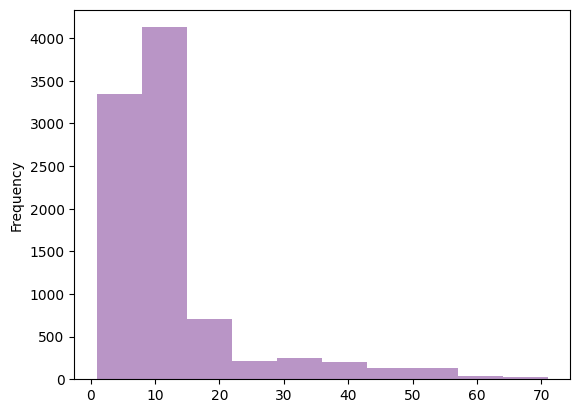

In [ ]:
oyster_data['shell_height_mm'].plot.hist(color='#b995c6')


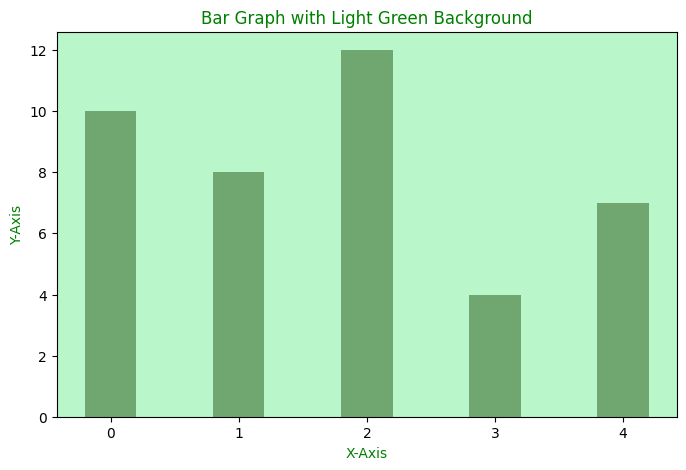

In [ ]:
# Bar graph color test

import matplotlib.pyplot as plt
import numpy as np

# Create data
x = np.arange(5)
y = [10, 8, 12, 4, 7]

# Configure plot
plt.figure(figsize=(8, 5))
plt.bar(x, y, color="#70a770", width=0.4)

# Set background color
plt.gca().set_facecolor("#b9f6ca")

# Add title and labels
plt.title("Bar Graph with Light Green Background", color="#008000")
plt.xlabel("X-Axis", color="#008000")
plt.ylabel("Y-Axis", color="#008000")

# Show plot
plt.show()
